In [ ]:
# The first part of the code is to generate data to test polynomial regression

import numpy as np


variation = 5
datapoints = 500
x_values = np.linspace(0, 4, datapoints) # this makes an array of 500 (the value of datapoints) values that are evenly...
y_values = []                              # ...spaced between 0 and 4(these are the x values of the points of out dataset)

for i in range(datapoints):
  y_value = 2.5 * x_values[i] ** 3 - 6 * x_values[i] ** 2 + 3.5 * x_values[i] + 1  #y = 2.5x^3 - 6x^2 + 3.5x + 1
  y_value_random = np.random.normal(y_value, variation)
  y_values.append(y_value_random)

y_values = np.array(y_values)

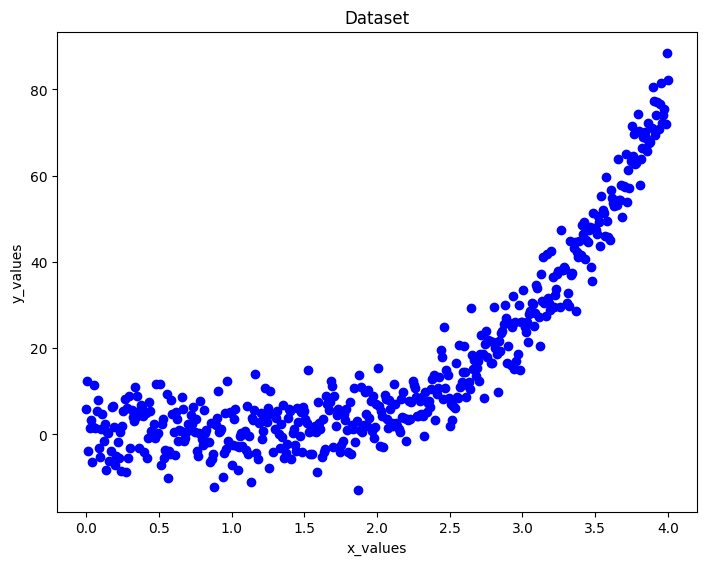

In [ ]:
# The following block of codes just plots the data for visualization purposes
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x_values, y_values, color='b')
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_title('Dataset')
plt.show()

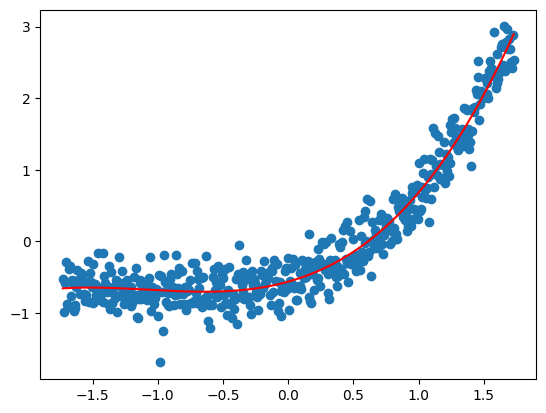

In [ ]:
# This is where actual regression starts

# Once again, we will be using existing libraries so that coding becomes much easier
# We will be using SciKit-Learn library, which is the go-to library for machine learning in Python (https://scikit-learn.org/stable/)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# data preprocessing part
x_values = x_values.reshape(datapoints, 1)

stder_x = StandardScaler()
stder_y = StandardScaler()

# data normalization is usally necessary for better computation
x_train = stder_x.fit_transform(x_values)
y_train = stder_y.fit_transform(y_values[:, np.newaxis]).flatten()

# we are creating a new object for Polynomial regression
# we will be using cubic representation in this example
cubic = PolynomialFeatures(degree=3)
x_cub_train = cubic.fit_transform(x_train)

# as we have covered in the class, linear regression is used in the end
from sklearn.linear_model import LinearRegression
model=LinearRegression( )
model.fit(x_cub_train, y_train)

y_predictions_c = model.predict(x_cub_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predictions_c, color='red')
plt.show()


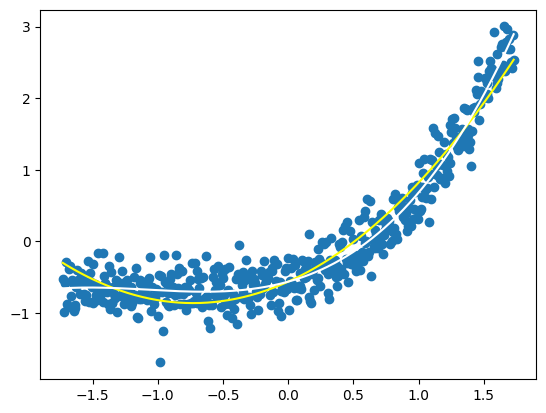

In [ ]:
quadratic = PolynomialFeatures(degree=2)
x_quad_train = quadratic.fit_transform(x_train)

model.fit(x_quad_train, y_train)

y_predictions_q = model.predict(x_quad_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predictions_q, color='yellow')
plt.plot(x_train, y_predictions_c, color='white')
plt.show()

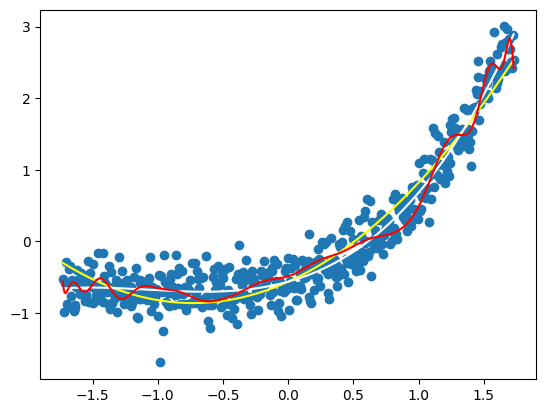

In [ ]:
high_order = PolynomialFeatures(degree=30)
x_high_train = high_order.fit_transform(x_train)

model.fit(x_high_train, y_train)

y_predictions_h = model.predict(x_high_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predictions_q, color='yellow')
plt.plot(x_train, y_predictions_c, color='white')
plt.plot(x_train, y_predictions_h, color='red')
plt.show()